In [1]:
import time
start_time=time.time()

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import interpolate

from astropy.io import fits
import astropy.units as u
from astropy.table import Table

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="17"
from sabreMod import sosf,sosfh

In [3]:
damiani_tab1_file = "Obs/J_A+A_591_A74_table1.dat.fits"
tab = Table.read(damiani_tab1_file)
tab

Id,RAdeg,DEdeg,HaNb,HaRVb,Hasigmab,HaNr,HaRVr,Hasigmar,[NII]Nb,[NII]RVb,[NII]sigmab,[NII]Nr,[NII]RVr,[NII]sigmar,HeINb,HeIRVb,HeIsigmab,HeINr,HeIRVr,HeIsigmar,[SII]1Nb,[SII]1RVb,[SII]1sigmab,[SII]1Nr,[SII]1RVr,[SII]1sigmar,[SII]2Nb,[SII]2RVb,[SII]2sigmab,[SII]2Nr,[SII]2RVr,[SII]2sigmar,Setup
,deg,deg,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,
bytes29,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes10
SKY__10434580-5930497,160.9408,-59.51381,43435.14,-23.61,15.61,58918.77,4.94,13.38,2943.68,-31.66,14.71,11672.97,2.10,10.67,15235.06,-22.16,13.79,18024.73,5.19,10.38,998.76,-32.45,12.98,3398.53,4.20,10.39,727.14,-33.94,12.95,2696.04,3.09,10.02,sky_HR15N
SKY__10445840-5933062,161.2433,-59.55172,18256.59,-31.12,13.93,34321.84,5.23,15.21,1130.41,-24.70,15.34,4429.57,5.90,15.36,5555.79,-30.83,11.55,11833.37,5.01,13.96,1655.72,-4.40,19.00,736.73,9.41,9.97,1304.64,-4.45,19.94,519.97,8.08,9.21,sky_HR15N
SKY__10445040-5935467,161.2100,-59.59631,34377.49,-28.47,13.77,65136.86,-0.09,17.20,2528.38,-22.84,13.49,3541.20,9.64,14.93,11447.99,-28.24,10.67,22875.81,0.41,14.87,1733.36,-20.27,18.14,950.03,14.14,12.06,1352.34,-19.90,18.25,642.85,13.89,11.27,sky_HR15N
SKY__10443390-5934549,161.1413,-59.58192,34307.92,-29.53,14.51,30563.08,-15.04,23.81,10198.94,-25.17,12.26,3538.75,-12.05,25.62,10756.85,-29.39,12.29,11023.40,-15.58,23.19,2687.79,-21.74,12.12,740.18,7.11,32.20,2636.84,-22.17,11.68,582.76,6.44,32.56,sky_HR15N
SKY__10451730-5942205,161.3221,-59.70569,37527.72,-28.25,15.50,22025.68,14.37,14.07,6328.36,-28.63,13.16,2644.65,15.04,12.74,9441.61,-27.95,11.69,7676.87,13.18,13.84,1748.67,-25.49,12.72,836.83,16.73,11.97,1313.25,-26.18,12.99,610.61,16.64,11.96,sky_HR15N
SKY__10451970-5945404,161.3321,-59.76122,24245.06,-21.95,15.87,9017.24,11.42,15.95,4011.71,-17.86,13.23,2122.03,-7.92,27.32,7065.39,-17.61,13.23,1828.86,14.34,8.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,sky_HR15N
SKY__10444430-5943333,161.1846,-59.72592,30519.80,-34.15,14.82,53892.78,7.00,14.64,7207.63,-33.96,12.22,5305.92,9.02,13.03,9951.92,-32.18,14.02,17619.99,7.92,12.14,2213.11,-31.97,11.54,1278.25,10.42,13.44,1662.81,-32.62,11.37,933.80,9.52,13.01,sky_HR15N
SKY__10440670-5947505,161.0279,-59.79736,8057.94,-24.88,16.14,10603.72,10.00,15.99,1587.50,-20.77,13.62,937.43,11.35,15.09,1064.69,-31.31,8.00,4338.92,5.87,17.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,sky_HR15N


In [4]:
df = tab.to_pandas()
df.describe()

,RAdeg,DEdeg,HaNb,HaRVb,Hasigmab,HaNr,HaRVr,Hasigmar,[NII]Nb,[NII]RVb,...,[SII]1sigmab,[SII]1Nr,[SII]1RVr,[SII]1sigmar,[SII]2Nb,[SII]2RVb,[SII]2sigmab,[SII]2Nr,[SII]2RVr,[SII]2sigmar
count,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,...,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000
mean,161.161726,-59.654315,62767.252113,-24.714007,15.885924,53873.122564,7.306363,16.018268,1631.775751,-8.739353,...,9.829619,1484.462829,9.367286,8.744284,1270.717298,-16.464157,9.631455,1203.455046,8.396328,8.680335
std,0.133125,0.080215,54846.830866,8.147913,2.757231,39423.863415,7.179267,5.690883,3522.508469,12.911389,...,6.643375,1633.447299,7.761613,6.028452,1931.147707,12.642477,6.675027,1461.860496,8.268913,6.144453
min,160.768700,-59.891890,0.000000,-51.840000,0.000000,0.000000,-25.070000,0.000000,0.000000,-44.180000,...,0.000000,0.000000,-16.630000,0.000000,0.000000,-39.300000,0.000000,0.000000,-47.760000,0.000000
25%,161.065825,-59.711945,28485.557500,-31.042500,14.320000,24528.595000,3.960000,13.850000,0.000000,-21.497500,...,0.000000,0.000000,0.000000,0.000000,0.000000,-27.327500,0.000000,0.000000,0.000000,0.000000
50%,161.155600,-59.657835,46452.860000,-26.800000,15.170000,45810.270000,7.635000,14.705000,0.000000,0.000000,...,12.010000,1135.875000,10.990000,11.110000,992.800000,-20.370000,11.700000,865.820000,9.485000,10.915000
75%,161.267100,-59.590390,76666.205000,-19.765000,16.707500,76315.320000,12.702500,16.310000,2243.900000,0.000000,...,13.950000,2091.252500,15.367500,12.155000,1706.045000,0.000000,13.857500,1642.482500,14.367500,12.087500
max,161.472400,-59.494310,483044.020000,0.000000,29.720000,372640.170000,32.650000,84.800000,44719.640000,7.920000,...,32.200000,12610.120000,54.680000,44.470000,29844.350000,2.940000,32.070000,13224.150000,61.700000,43.280000


[Text(0.5, 0, 'Velocity')]

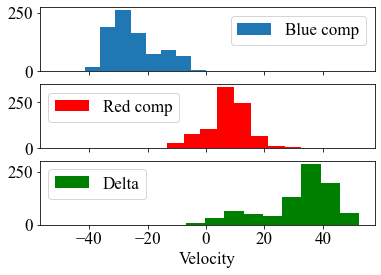

In [5]:
fig, [axb, axr, axd] = plt.subplots(3, 1, sharex=True)
axb.hist(tab["HaRVb"], label='Blue comp')
axr.hist(tab["HaRVr"], color='r', label='Red comp')
axd.hist(tab["HaRVr"] - tab["HaRVb"], color='g', label='Delta')
for ax in axb, axr, axd:
    ax.legend()
axd.set(xlabel='Velocity')

In [6]:
df = df.assign(Ha_dV=df['HaRVr'] - df['HaRVb'])
df = df.assign(Ha_close=(df['Ha_dV'] < 15.0).astype('S5') )
df = df.assign(Ha_rb_ratio=np.log10(df['HaNr']/df['HaNb']))

Blue component

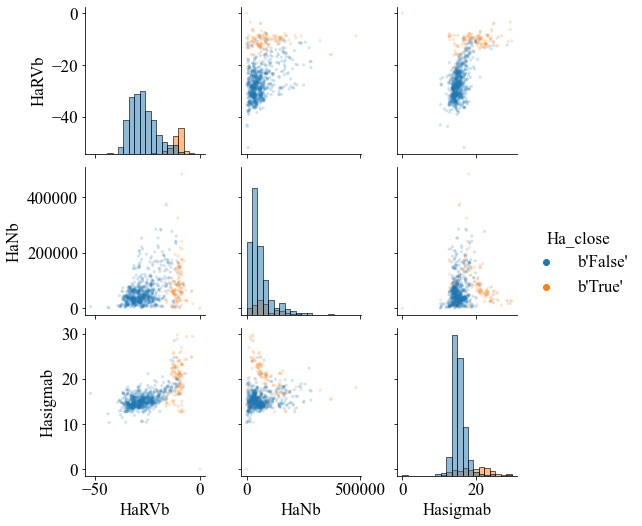

In [7]:
sns.pairplot(df, 
             vars=["HaRVb", "HaNb", "Hasigmab"], 
             diag_kind='hist', hue="Ha_close", 
             plot_kws=dict(alpha=0.2, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


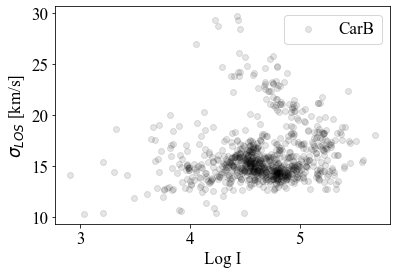

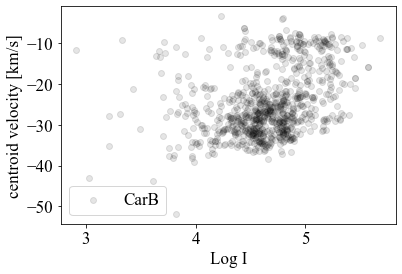

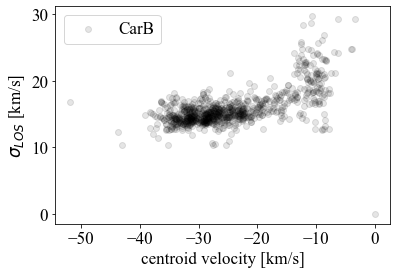

In [8]:
fig, ax = plt.subplots()
plt.scatter(np.log10(df.HaNb),df.Hasigmab, alpha=0.1, color='k', label='CarB')

ax.set_xlabel('Log I')
ax.set_ylabel('$σ_{LOS}$ [km/s]')
plt.legend()

fig, ax = plt.subplots()
plt.scatter(np.log10(df.HaNb),df.HaRVb, alpha=0.1, color='k', label='CarB')

ax.set_xlabel('Log I')
ax.set_ylabel('centroid velocity [km/s]')
plt.legend()

fig, ax = plt.subplots()
plt.scatter(df.HaRVb,df.Hasigmab, alpha=0.1, color='k', label='CarB')

ax.set_ylabel('$σ_{LOS}$ [km/s]')
ax.set_xlabel('centroid velocity [km/s]')
plt.legend()

plt.rcParams["font.size"]="17"

#fig.savefig('CarinaBlue.pdf', bbox_inches='tight')

Red Component

In [9]:
mask = df['Hasigmar'] > 35.0
df = df[~mask]


In [10]:
df.dropna(inplace=True)

<ipython-input-10-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


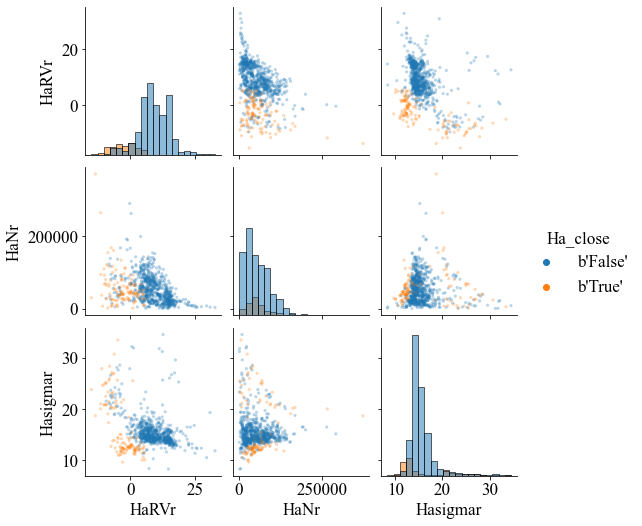

In [11]:
sns.pairplot(df, 
             vars=["HaRVr", "HaNr", "Hasigmar"], 
             diag_kind='hist', hue="Ha_close",
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

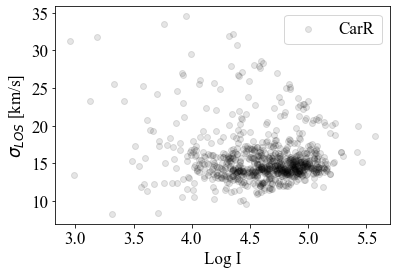

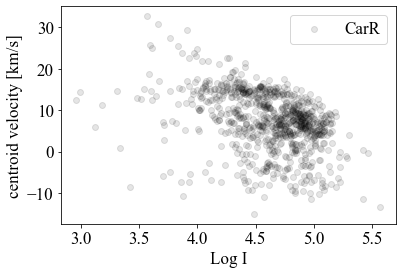

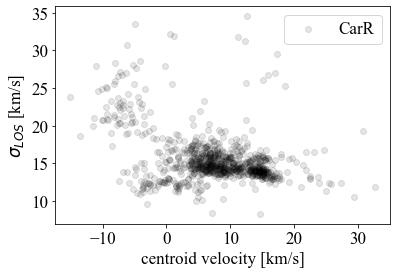

In [12]:
fig, ax = plt.subplots()
plt.scatter(np.log10(df.HaNr),df.Hasigmar, alpha=0.1, color='k', label='CarR')

ax.set_xlabel('Log I')
ax.set_ylabel('$σ_{LOS}$ [km/s]')

plt.legend()

fig, ax = plt.subplots()
plt.scatter(np.log10(df.HaNr),df.HaRVr, alpha=0.1, color='k', label='CarR')

plt.legend()

ax.set_xlabel('Log I')
ax.set_ylabel('centroid velocity [km/s]')

fig, ax = plt.subplots()
plt.scatter(df.HaRVr,df.Hasigmar, alpha=0.1, color='k', label='CarR')

ax.set_ylabel('$σ_{LOS}$ [km/s]')
ax.set_xlabel('centroid velocity [km/s]')
plt.legend()

plt.rcParams["font.size"]="17"

#fig.savefig('CarinaRed.pdf', bbox_inches='tight')

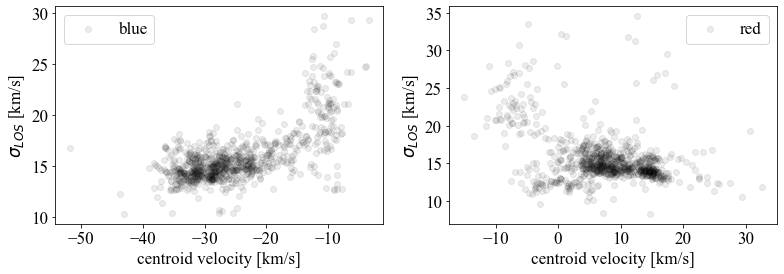

In [13]:
plt.figure(figsize=(20, 4))

plt.subplot(131)
plt.scatter(df.HaRVb,df.Hasigmab, alpha=0.075, color='k', label='blue')
plt.xlabel('centroid velocity [km/s]')
plt.ylabel('$σ_{LOS}$ [km/s]')
plt.legend()

plt.subplot(132)
plt.scatter(df.HaRVr,df.Hasigmar, alpha=0.075, color='k', label='red')
plt.xlabel('centroid velocity [km/s]')
plt.ylabel('$σ_{LOS}$ [km/s]')
plt.legend()

plt.show()

plt.rcParams["font.size"]="17"

#fig.savefig('CarinaLOSvsPOS.pdf', bbox_inches='tight')

Combining Components

In [14]:
def combine_moments(f1, v1, s1, f2, v2, s2, return_skew=False):
    """Find combined flux, mean velocity, and sigma for two components 
    with fluxes `f1` and `f2`, velocities `v1` and `v2`, and sigmas `s1` and `s2`. 
    Returns tuple of the combined moments: `f`, `v`, `s`."""
    f = f1 + f2
    v = (v1*f1 + v2*f2)/f
    ss = (s1*s1*f1 + s2*s2*f2)/f
    ss += f1*f2*(v1 - v2)**2 / f**2
    s = np.sqrt(ss)
    if return_skew:
        p1 = f1/f
        p2 = f2/f
        skew = p1*p2*(v1 - v2)*((1 - 2*p1)*(v1 - v2)**2 + 3*(s1**2 - s2**2))
        skew /= (p1*(p2*(v1 - v2)**2 + s1**2 - s2**2) + s2**2)**1.5
#        vmode = np.where(f1 > f2, v1, v2)
#        mskew = (v - vmode)/s
        return f, v, s, skew
    else:
        return f, v, s

In [15]:
fHa, vHa, sHa, gHa = combine_moments(
    df.HaNr, df.HaRVr, df.Hasigmar, 
    df.HaNb, df.HaRVb, df.Hasigmab,
    return_skew=True
)

In [16]:
dfHa = pd.DataFrame(
    {'log_F': np.log10(fHa), 
     'V_mean': vHa, 
     'sigma': sHa, 
     'skew': gHa,
     'R_B': df.Ha_rb_ratio,
     'dV': df.Ha_dV,
     'close': df.Ha_close,
     'RAdeg': df.RAdeg,
     'DEdeg': df.DEdeg,
    }
).dropna()

In [17]:
dfHa.describe()

,log_F,V_mean,sigma,skew,R_B,dV,RAdeg,DEdeg
count,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000
mean,4.980402,-8.830675,22.468922,-0.031035,-0.040272,32.261018,161.162622,-59.654128
std,0.302783,4.229329,2.730988,0.306038,0.436005,11.880264,0.132337,0.080008
min,3.413632,-22.703236,15.856762,-0.802990,-1.652288,-2.440000,160.768700,-59.891890
25%,4.827033,-11.433731,20.525060,-0.248047,-0.272299,28.805000,161.068450,-59.712000
50%,5.021479,-8.695479,22.423762,-0.047386,0.006337,35.580000,161.157600,-59.658080
75%,5.180976,-5.994656,24.173194,0.187720,0.248846,40.410000,161.267100,-59.589670
max,5.706532,2.921228,31.576729,0.857175,1.441905,52.510000,161.472400,-59.494310


Maps

In [18]:
points_of_interest = {
    "eta Car": [161.26517, -59.684425],
    "Tr 14": [160.98911, -59.547698],
    "WR 25": [161.0433, -59.719735],
    "Finger": [161.13133, -59.664035],
}
def mark_points(ax):
    for label, c in points_of_interest.items():
        ax.plot(c[0], c[1], marker='+', markersize='12', color='k')

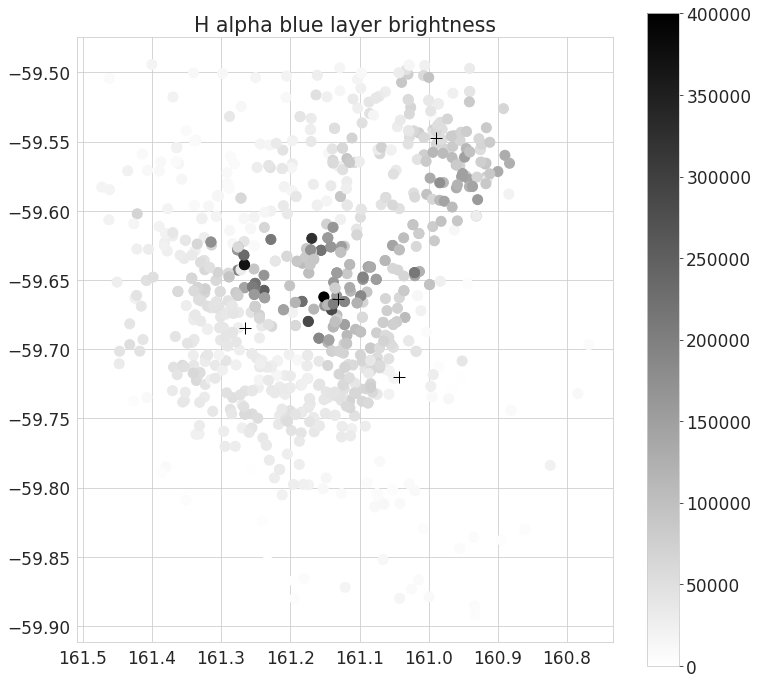

In [19]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(12, 12))
    scat = ax.scatter(df.RAdeg, df.DEdeg, s=100, c=df.HaNb, cmap='gray_r', vmin=0.0, vmax=4e5)
    fig.colorbar(scat, ax=ax)
    mark_points(ax)
    ax.invert_xaxis()
    ax.set_aspect(2)
    ax.set_title('H alpha blue layer brightness')

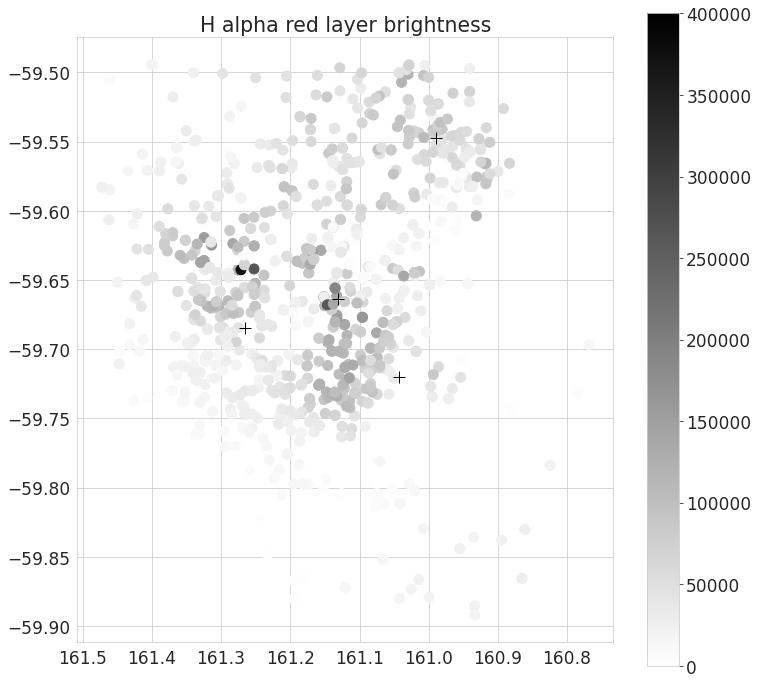

In [20]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(12, 12))
    scat = ax.scatter(df.RAdeg, df.DEdeg, s=100, c=df.HaNr, cmap='gray_r', vmin=0.0, vmax=4e5)
    fig.colorbar(scat, ax=ax)
    mark_points(ax)
    ax.invert_xaxis()
    ax.set_aspect(2)
    ax.set_title('H alpha red layer brightness')

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


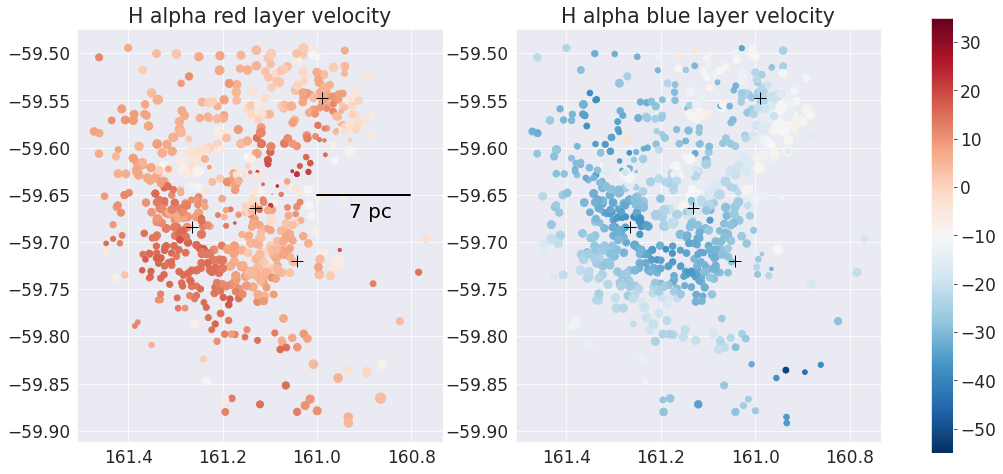

In [21]:
with sns.axes_style("darkgrid"):
    fig, [axr, axb] = plt.subplots(1, 2, figsize=(18, 8))
    scat = axr.scatter(df.RAdeg, df.DEdeg, 
                      s=40*(np.log10(df.HaNr/df.HaNb) + 1.3), 
                      c=df.HaRVr, cmap='RdBu_r',
                      vmin=-55, vmax=35, 
                     )
    
    axr.text(0.53, 0.2, '7 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
    
    axr.axhline(y=-59.65, xmin=0.655, xmax=0.91, linewidth=2, color = 'k')
    
    scat = axb.scatter(df.RAdeg, df.DEdeg, 
                      s=40*(np.log10(df.HaNb/df.HaNr) + 1.3), 
                      c=df.HaRVb, cmap='RdBu_r',
                      vmin=-55, vmax=35,
                     )
    
#    scat2 = ax.scatter(df.RAdeg, df.DEdeg, 
#                      s=50*(np.log10(df.HaNr) - 3), 
#                      c=df.HaRVr, cmap='RdBu_r',
#                      vmin=-55, vmax=35, marker='+',
#                     )
    fig.colorbar(scat, ax=[axr, axb])
    mark_points(axr)
    mark_points(axb)
    axr.invert_xaxis()
    axr.set_aspect(2.0)
    axb.invert_xaxis()
    axb.set_aspect(2.0)  
    axr.set_title('H alpha red layer velocity')
    axb.set_title('H alpha blue layer velocity')

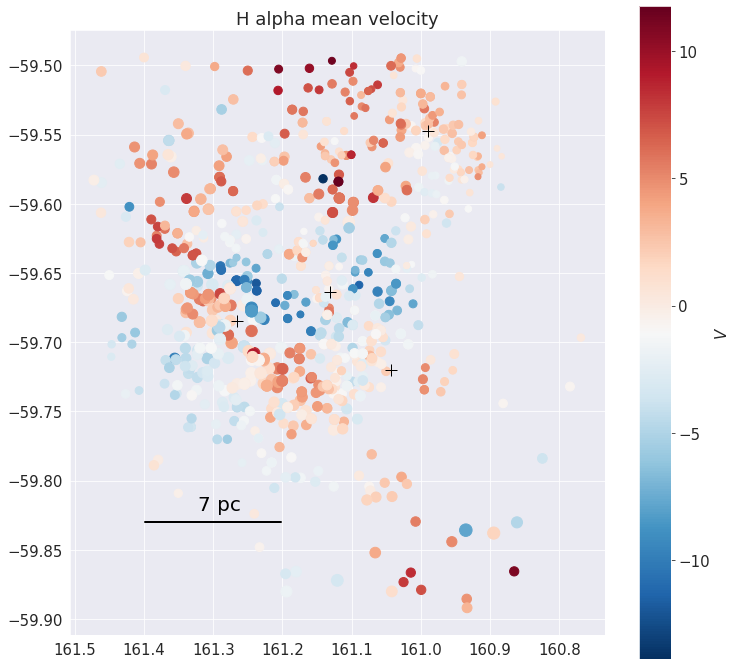

In [135]:
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(12, 12))
    scat = ax.scatter(dfHa.RAdeg, dfHa.DEdeg, s=8*(dfHa.sigma - 12), c=dfHa.V_mean-dfHa.V_mean.mean(), cmap='RdBu_r')
    mark_points(ax)
    fig.colorbar(scat, ax=ax).set_label("$V$")
    ax.invert_xaxis()
    ax.set_aspect(2)
    ax.set_title("H alpha mean velocity")
    
    ax.text(0.32, 0.2, '7 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
    ax.axhline(y=-59.83, xmin=0.14, xmax=0.395, linewidth=2, color = 'k')

In [134]:
dfHa.V_mean-dfHa.V_mean.mean()

0       1.655131
1       1.439015
2      -1.063270
3     -13.872561
4      -3.656422
         ...    
861     2.400260
862     0.135196
863     0.510771
864    -0.478380
865    -0.171239
Name: V_mean, Length: 855, dtype: float64

Structure Fucntion

Dr. Will Blue

In [32]:
df1 = pd.DataFrame(
    {'RA': df2.X, 'DE': df2.Y, 'V':df2.RV, '_key': 1}
)

In [33]:
df1.describe()

,RA,DE,V,_key
count,855.000000,855.000000,855.000000,855.0
mean,161.162622,-59.654128,-24.905801,1.0
std,0.132337,0.080008,8.011917,0.0
min,160.768700,-59.891890,-51.840000,1.0
25%,161.068450,-59.712000,-31.075000,1.0
50%,161.157600,-59.658080,-26.930000,1.0
75%,161.267100,-59.589670,-20.365000,1.0
max,161.472400,-59.494310,-3.420000,1.0


In [34]:
df2 = df1.copy()

In [35]:
pairs = pd.merge(df1, df2, on='_key', suffixes=('', '_')).drop('_key', 1)
pairs.index = pd.MultiIndex.from_product((df1.index, df2.index))

pairs.head()

RA        DE      V       RA_       DE_     V_
0 0  160.9408 -59.51381 -23.61  160.9408 -59.51381 -23.61
  1  160.9408 -59.51381 -23.61  161.2433 -59.55172 -31.12
  2  160.9408 -59.51381 -23.61  161.2100 -59.59631 -28.47
  3  160.9408 -59.51381 -23.61  161.1413 -59.58192 -29.53
  4  160.9408 -59.51381 -23.61  161.3221 -59.70569 -28.25

In [36]:
pairs.loc[:, 'dDE'] = 3600*(pairs.DE - pairs.DE_)
pairs.loc[:, 'dRA'] = 3600*(pairs.RA - pairs.RA_)*np.cos(np.radians(0.5*(pairs.DE + pairs.DE_)))
pairs.loc[:, 's'] = np.hypot(pairs.dRA, pairs.dDE)
pairs.loc[:, 'log_s'] = np.log10(pairs.s)
pairs.loc[:, 'dV'] = pairs.V - pairs.V_
pairs.loc[:, 'dV2'] = pairs.dV**2
pairs.loc[:, 'log_dV2'] = np.log10(pairs.dV**2)
pairs.loc[:, 'VV_mean'] = 0.5*(pairs.V + pairs.V_)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [37]:
pairs = pairs[(pairs.dDE > 0.0) & (pairs.dRA > 0.0)]

In [38]:
pairs.head()

RA        DE      V       RA_       DE_     V_      dDE  \
0 11  160.9408 -59.51381 -23.61  160.9254 -59.55578 -13.00  151.092   
  25  160.9408 -59.51381 -23.61  160.9183 -59.56622 -11.58  188.676   
  54  160.9408 -59.51381 -23.61  160.9254 -59.55578 -12.94  151.092   
  55  160.9408 -59.51381 -23.61  160.9000 -59.57164  -9.60  208.188   
  84  160.9408 -59.51381 -23.61  160.9233 -59.55178 -12.78  136.692   

            dRA           s     log_s     dV       dV2   log_dV2  VV_mean  
0 11  28.108912  153.684428  2.186630 -10.61  112.5721  2.051431  -18.305  
  25  41.061855  193.092488  2.285765 -12.03  144.7209  2.160531  -17.595  
  54  28.108912  153.684428  2.186630 -10.67  113.8489  2.056329  -18.275  
  55  74.452842  221.100586  2.344590 -14.01  196.2801  2.292876  -16.605  
  84  31.943841  140.374898  2.147289 -10.83  117.2889  2.069257  -18.195

In [39]:
pairs.describe()

,RA,DE,V,RA_,DE_,V_,dDE,dRA,s,log_s,dV,dV2,log_dV2,VV_mean
count,158898.000000,158898.000000,158898.000000,158898.000000,158898.000000,158898.000000,158898.000000,158898.000000,158898.000000,158898.000000,158898.000000,158898.000000,1.588980e+05,158898.000000
mean,161.248591,-59.622840,-26.467335,161.108225,-59.708101,-26.468249,306.938792,255.187624,441.770466,2.565181,0.000914,99.783418,-inf,-26.467792
std,0.111299,0.063358,7.738337,0.110135,0.073249,7.437928,243.492084,192.784289,246.221348,0.290559,9.989196,159.625162,NaN,5.714569
min,160.881100,-59.885500,-51.840000,160.768700,-59.891890,-51.840000,0.072000,0.181342,0.211978,-0.673709,-35.210000,0.000000,-inf,-47.760000
25%,161.166700,-59.668330,-31.740000,161.042500,-59.744250,-31.560000,115.812000,99.607933,260.105192,2.415149,-5.960000,6.300100,7.993474e-01,-30.590000
50%,161.266700,-59.627640,-28.670000,161.112900,-59.711390,-27.700000,251.100000,216.469030,407.012504,2.609608,-0.440000,31.809600,1.502558e+00,-27.600000
75%,161.332500,-59.570780,-23.370000,161.180400,-59.665580,-22.530000,442.800000,372.035888,583.830864,2.766287,5.260000,122.323600,2.087510e+00,-23.050000
max,161.472400,-59.494310,-3.420000,161.462100,-59.494720,-3.420000,1431.288000,1280.427149,1693.387954,3.228756,48.420000,2344.496400,3.370050e+00,-4.805000


In [40]:
pairs.corr()

,RA,DE,V,RA_,DE_,V_,dDE,dRA,s,log_s,dV,dV2,log_dV2,VV_mean
RA,1.000000,-0.136218,-0.427649,0.541279,-0.070135,-0.152189,-0.051646,0.487405,0.210137,0.256414,-0.217968,-0.176835,-0.138633,-0.388591
DE,-0.136218,1.000000,0.226302,-0.115339,0.517674,0.285560,0.376107,-0.021139,0.298798,0.272785,-0.037318,0.208296,0.156231,0.339061
V,-0.427649,0.226302,1.000000,-0.252939,0.120270,0.133959,0.081736,-0.185970,-0.018156,-0.031194,0.674925,0.340886,0.245583,0.764249
RA_,0.541279,-0.115339,-0.252939,1.000000,0.009630,-0.168441,-0.118472,-0.470377,-0.366669,-0.304182,-0.070523,-0.212157,-0.169197,-0.280877
DE_,-0.070135,0.517674,0.120270,0.009630,1.000000,0.443480,-0.598057,-0.081269,-0.494197,-0.416883,-0.237044,0.031868,0.033865,0.370042
V_,-0.152189,0.285560,0.133959,-0.168441,0.443480,1.000000,-0.212785,0.016559,-0.127815,-0.091922,-0.640823,0.110174,0.195752,0.741486
dDE,-0.051646,0.376107,0.081736,-0.118472,-0.598057,-0.212785,1.000000,0.068211,0.815102,0.707005,0.221757,0.160607,0.109665,-0.083137
dRA,0.487405,-0.021139,-0.185970,-0.470377,-0.081269,0.016559,0.068211,1.000000,0.600946,0.584789,-0.156396,0.035086,0.030477,-0.115138
s,0.210137,0.298798,-0.018156,-0.366669,-0.494197,-0.127815,0.815102,0.600946,1.000000,0.907523,0.081105,0.178816,0.128807,-0.095473
log_s,0.256414,0.272785,-0.031194,-0.304182,-0.416883,-0.091922,0.707005,0.584789,0.907523,1.000000,0.044280,0.159202,0.146648,-0.080942


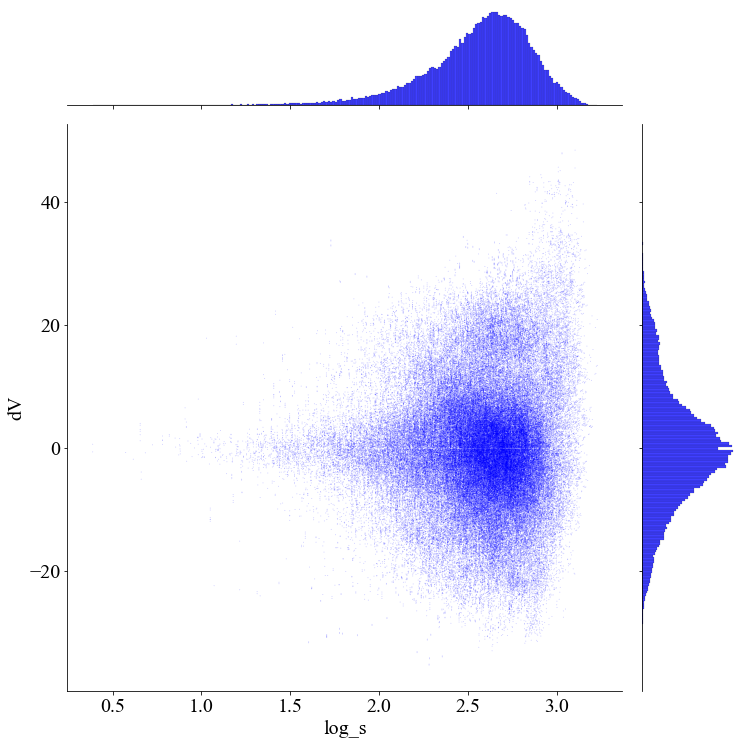

In [41]:
mask = (pairs.log_s > 0.0) & (pairs.log_dV2 > -3)
ax = sns.jointplot(x='log_s', y='dV', data=pairs[mask], alpha=0.2, s=1, edgecolor='none',color="blue")

ax.fig.set_size_inches(12, 12)

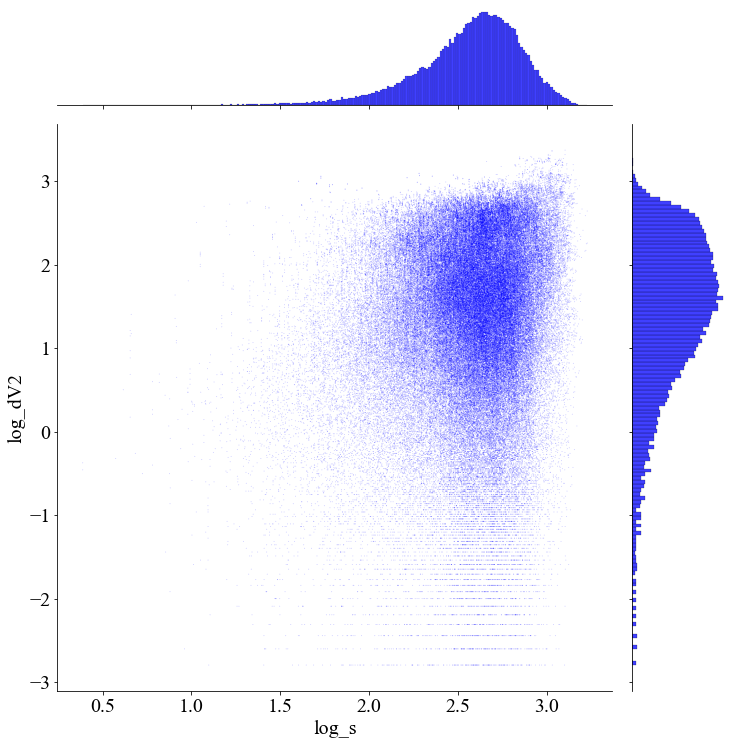

In [42]:
mask = (pairs.log_s > 0.0) & (pairs.log_dV2 > -3)
ax = sns.jointplot(x='log_s', y='log_dV2', data=pairs[mask], alpha=0.2, s=1, edgecolor='none',color="blue")
ax.fig.set_size_inches(12, 12)

In [43]:
pairs.loc[:, 's_class'] = pd.Categorical((2*pairs.log_s + 0.5).astype('int'), ordered=True)

In [44]:
pairs.s_class[pairs.s_class == 0] = 1

In [45]:
for j in range(7):
    print()
    print("s_class =", j)
    print(pairs[pairs.s_class == j][['dV2', 'log_s']].describe())


s_class = 0
       dV2  log_s
count  0.0    0.0
mean   NaN    NaN
std    NaN    NaN
min    NaN    NaN
25%    NaN    NaN
50%    NaN    NaN
75%    NaN    NaN
max    NaN    NaN

s_class = 1
             dV2      log_s
count  16.000000  16.000000
mean    6.241369   0.470543
std     7.659356   0.411279
min     0.202500  -0.673709
25%     0.462700   0.526791
50%     2.328400   0.654966
75%    10.473775   0.656446
max    25.300900   0.723970

s_class = 2
              dV2       log_s
count  176.000000  176.000000
mean    22.788670    1.091564
std     72.218518    0.116531
min      0.000000    0.780460
25%      0.455700    1.015461
50%      1.877000    1.104573
75%      5.051425    1.194617
max    528.080400    1.239472

s_class = 3
               dV2        log_s
count  2227.000000  2227.000000
mean     28.644136     1.583505
std      96.660327     0.128390
min       0.000000     1.250376
25%       0.748250     1.490021
50%       3.880900     1.612689
75%      14.976900     1.694222
max    1

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


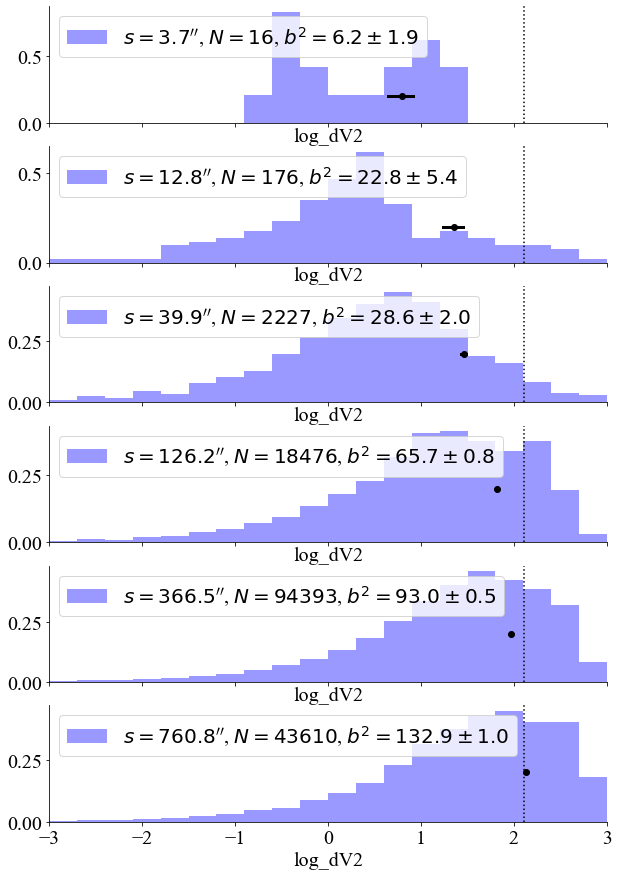

In [46]:
sig2 = pairs.dV2.mean()
sig2a = 2*np.var(df1.V)
fig, axes = plt.subplots(6, 1, figsize=(10, 15), sharex=True)
for sclass, ax in zip(range(1, 7), axes):
    b2mean = np.mean(pairs.dV2[pairs.s_class == sclass])
    b2std = np.std(pairs.dV2[pairs.s_class == sclass])
    b2mean2 = np.mean(pairs.log_dV2[pairs.s_class == sclass])
    n = np.sum(pairs.s_class == sclass)
    b2sem = b2std/np.sqrt(n)
    smean = np.mean(10**pairs.log_s[pairs.s_class == sclass])
    label = f"$s = {smean:.1f}''$"
    label += f", $N = {n}$"
    label += fr", $b^2 = {b2mean:.1f} \pm {b2sem:.1f}$"
    sns.distplot(pairs.log_dV2[pairs.s_class == sclass], 
                 norm_hist=True, kde=False, ax=ax,
                 label=label, bins=20,color="blue", hist_kws=dict(range=[-3.0, 3.0])
                )
    ax.plot([np.log10(b2mean)], [0.2], 'o', color='k')
    ax.plot([np.log10(b2mean - b2sem), np.log10(b2mean + b2sem)], [0.2]*2, lw=3, color='k')
    ax.axvline(np.log10(sig2a), color='k', ls=':')
    ax.set(xlim=[-3.0, 3.0])
    ax.legend(loc='upper left')
sns.despine()

In [47]:
print(f'Dotted line is 2 x sigma^2 = {sig2a:.2f}')

Dotted line is 2 x sigma^2 = 128.23


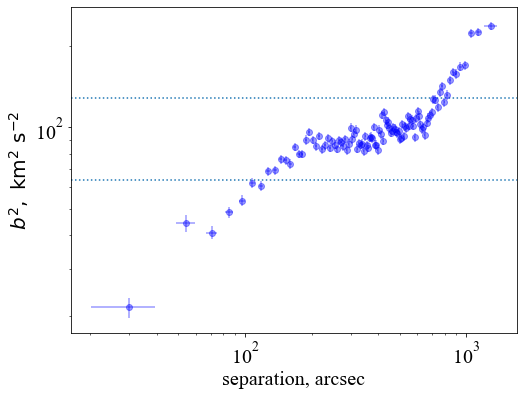

In [48]:
ngroup = 1500
groups = np.arange(len(pairs)) // ngroup
table = pairs[['s', 'dV2']].sort_values('s').groupby(groups).describe()
fig, ax = plt.subplots(figsize=(8, 6))
s = table[('s', 'mean')]
e_s = table[('s', 'std')]
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')]/np.sqrt(ng - 1)
#ax.plot(s, b2, 'o')
ax.axhline(sig2a, ls=':')
ax.axhline(0.5*sig2a, ls=':')
ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4,color="blue")
#sgrid = np.logspace(1.0, 3.0)
#ax.plot(sgrid, 0.08*sgrid**(0.83), color="k", lw=0.5)
ax.set(xscale='log', yscale='log', 
       xlabel='separation, arcsec',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

In [49]:
table=[s*pc1,b2,e_s,e_b2]
dfx2=pd.DataFrame(table)
dfx2=dfx2.transpose()
dfx2=dfx2.set_axis(['pc', 'S', 'ErrX', 'ErrY'], axis=1, inplace=False)
dfx2.to_csv('SFdata//CarB2.csv',mode = 'w', index=False)

Red Dr. Will

In [58]:
df1 = pd.DataFrame(
    {'RA': df3.X, 'DE': df3.Y, 'V':df3.RV, '_key': 1}
)

In [59]:
df1.describe()


,RA,DE,V,_key
count,855.000000,855.000000,855.000000,855.0
mean,161.162622,-59.654128,7.355216,1.0
std,0.132337,0.080008,7.084257,0.0
min,160.768700,-59.891890,-15.040000,1.0
25%,161.068450,-59.712000,3.960000,1.0
50%,161.157600,-59.658080,7.640000,1.0
75%,161.267100,-59.589670,12.720000,1.0
max,161.472400,-59.494310,32.650000,1.0


In [60]:
df2 = df1.copy()

In [61]:
pairs = pd.merge(df1, df2, on='_key', suffixes=('', '_')).drop('_key', 1)
pairs.index = pd.MultiIndex.from_product((df1.index, df2.index))

pairs.head()

RA        DE     V       RA_       DE_     V_
0 0  160.9408 -59.51381  4.94  160.9408 -59.51381   4.94
  1  160.9408 -59.51381  4.94  161.2433 -59.55172   5.23
  2  160.9408 -59.51381  4.94  161.2100 -59.59631  -0.09
  3  160.9408 -59.51381  4.94  161.1413 -59.58192 -15.04
  4  160.9408 -59.51381  4.94  161.3221 -59.70569  14.37

In [62]:
pairs.loc[:, 'dDE'] = 3600*(pairs.DE - pairs.DE_)
pairs.loc[:, 'dRA'] = 3600*(pairs.RA - pairs.RA_)*np.cos(np.radians(0.5*(pairs.DE + pairs.DE_)))
pairs.loc[:, 's'] = np.hypot(pairs.dRA, pairs.dDE)
pairs.loc[:, 'log_s'] = np.log10(pairs.s)
pairs.loc[:, 'dV'] = pairs.V - pairs.V_
pairs.loc[:, 'dV2'] = pairs.dV**2
pairs.loc[:, 'log_dV2'] = np.log10(pairs.dV**2)
pairs.loc[:, 'VV_mean'] = 0.5*(pairs.V + pairs.V_)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [63]:
pairs = pairs[(pairs.dDE > 0.0) & (pairs.dRA > 0.0)]

In [64]:
pairs.head()

RA        DE     V       RA_       DE_    V_      dDE        dRA  \
0 11  160.9408 -59.51381  4.94  160.9254 -59.55578 -0.38  151.092  28.108912   
  25  160.9408 -59.51381  4.94  160.9183 -59.56622 -2.50  188.676  41.061855   
  54  160.9408 -59.51381  4.94  160.9254 -59.55578 -1.00  151.092  28.108912   
  55  160.9408 -59.51381  4.94  160.9000 -59.57164 -3.70  208.188  74.452842   
  84  160.9408 -59.51381  4.94  160.9233 -59.55178  0.24  136.692  31.943841   

               s     log_s    dV      dV2   log_dV2  VV_mean  
0 11  153.684428  2.186630  5.32  28.3024  1.451823     2.28  
  25  193.092488  2.285765  7.44  55.3536  1.743146     1.22  
  54  153.684428  2.186630  5.94  35.2836  1.547573     1.97  
  55  221.100586  2.344590  8.64  74.6496  1.873027     0.62  
  84  140.374898  2.147289  4.70  22.0900  1.344196     2.59

In [65]:
pairs.describe()

,RA,DE,V,RA_,DE_,V_,dDE,dRA,s,log_s,dV,dV2,log_dV2,VV_mean
count,158898.000000,158898.000000,158898.000000,158898.000000,158898.000000,158898.000000,158898.000000,158898.000000,158898.000000,158898.000000,158898.000000,158898.000000,1.588980e+05,158898.000000
mean,161.248591,-59.622840,7.108598,161.108225,-59.708101,7.497774,306.938792,255.187624,441.770466,2.565181,-0.389176,83.784200,-inf,7.303186
std,0.111299,0.063358,6.552459,0.110135,0.073249,6.880163,243.492084,192.784289,246.221348,0.290559,9.145123,140.823505,NaN,4.922130
min,160.881100,-59.885500,-15.040000,160.768700,-59.891890,-15.040000,0.072000,0.181342,0.211978,-0.673709,-47.690000,0.000000,-inf,-13.225000
25%,161.166700,-59.668330,4.320000,161.042500,-59.744250,4.280000,115.812000,99.607933,260.105192,2.415149,-5.870000,5.856400,7.676307e-01,4.250000
50%,161.266700,-59.627640,7.450000,161.112900,-59.711390,7.430000,251.100000,216.469030,407.012504,2.609608,-0.070000,30.802500,1.488586e+00,7.725000
75%,161.332500,-59.570780,11.370000,161.180400,-59.665580,12.590000,442.800000,372.035888,583.830864,2.766287,5.230000,96.825600,1.985990e+00,10.775000
max,161.472400,-59.494310,32.650000,161.462100,-59.494720,32.650000,1431.288000,1280.427149,1693.387954,3.228756,44.060000,2274.336100,3.356855e+00,31.695000


In [66]:
pairs.corr()

,RA,DE,V,RA_,DE_,V_,dDE,dRA,s,log_s,dV,dV2,log_dV2,VV_mean
RA,1.000000,-0.136218,0.216012,0.541279,-0.070135,0.201187,-0.051646,0.487405,0.210137,0.256414,0.003413,-0.125542,-0.096033,0.284390
DE,-0.136218,1.000000,-0.383264,-0.115339,0.517674,-0.112203,0.376107,-0.021139,0.298798,0.272785,-0.190194,0.064283,0.090319,-0.333524
V,0.216012,-0.383264,1.000000,0.114677,-0.191551,0.073622,-0.151572,0.106890,-0.063152,-0.064610,0.661109,-0.197058,-0.171054,0.717067
RA_,0.541279,-0.115339,0.114677,1.000000,0.009630,0.376500,-0.118472,-0.470377,-0.366669,-0.304182,-0.201087,-0.119598,-0.129493,0.339467
DE_,-0.070135,0.517674,-0.191551,0.009630,1.000000,-0.134322,-0.598057,-0.081269,-0.494197,-0.416883,-0.036191,0.084025,0.073090,-0.221377
V_,0.201187,-0.112203,0.073622,0.376500,-0.134322,1.000000,0.040364,-0.180092,-0.074233,-0.059765,-0.699581,0.004589,-0.079270,0.747905
dDE,-0.051646,0.376107,-0.151572,-0.118472,-0.598057,0.040364,1.000000,0.068211,0.815102,0.707005,-0.138968,-0.030781,0.005448,-0.072678
dRA,0.487405,-0.021139,0.106890,-0.470377,-0.081269,-0.180092,0.068211,1.000000,0.600946,0.584789,0.212076,-0.007437,0.033770,-0.054719
s,0.210137,0.298798,-0.063152,-0.366669,-0.494197,-0.074233,0.815102,0.600946,1.000000,0.907523,0.010600,-0.010206,0.047306,-0.093916
log_s,0.256414,0.272785,-0.064610,-0.304182,-0.416883,-0.059765,0.707005,0.584789,0.907523,1.000000,-0.001330,0.013949,0.086421,-0.084775


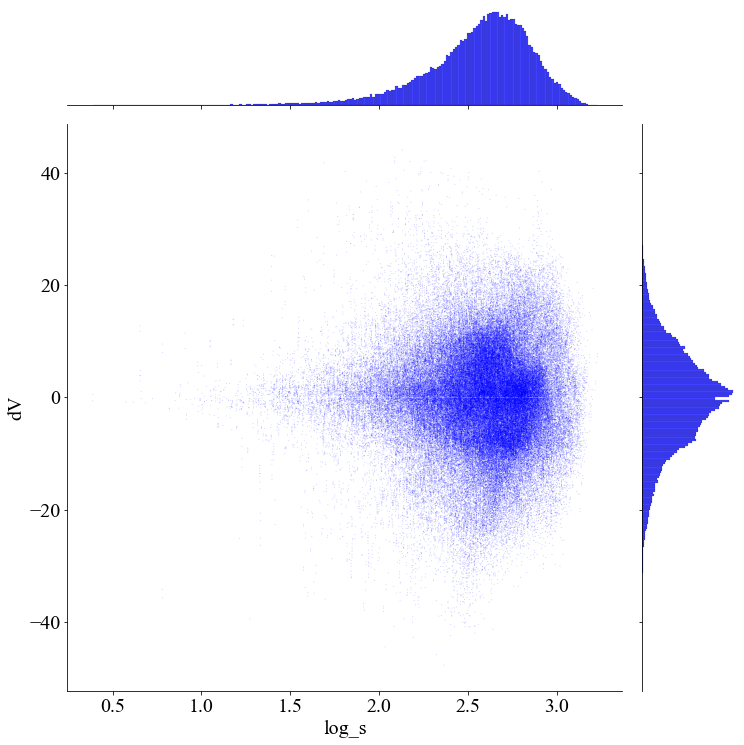

In [67]:
mask = (pairs.log_s > 0.0) & (pairs.log_dV2 > -3)
ax = sns.jointplot(x='log_s', y='dV', data=pairs[mask], alpha=0.2, s=1, edgecolor='none',color="blue")

ax.fig.set_size_inches(12, 12)

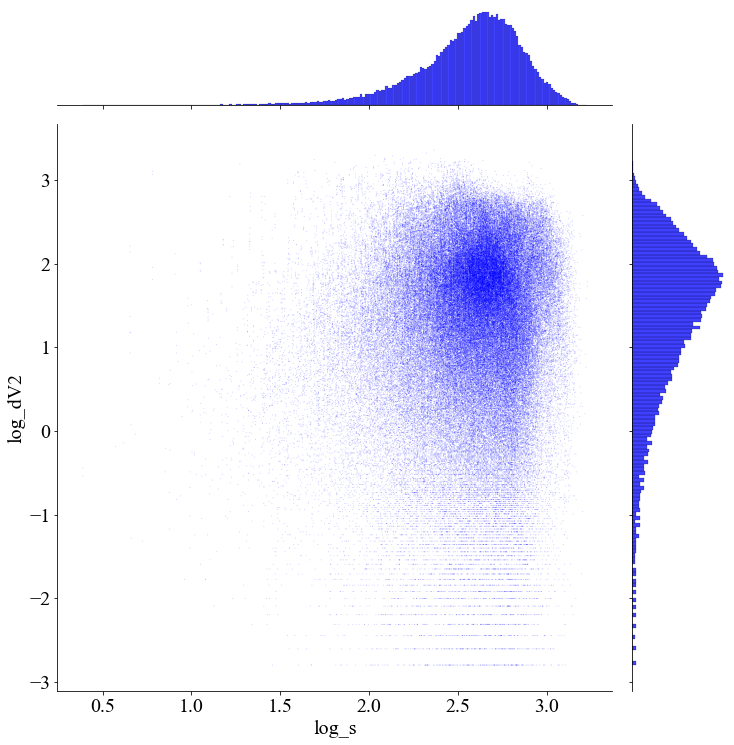

In [68]:
mask = (pairs.log_s > 0.0) & (pairs.log_dV2 > -3)
ax = sns.jointplot(x='log_s', y='log_dV2', data=pairs[mask], alpha=0.2, s=1, edgecolor='none',color="blue")
ax.fig.set_size_inches(12, 12)

In [69]:
pairs.loc[:, 's_class'] = pd.Categorical((2*pairs.log_s + 0.5).astype('int'), ordered=True)

In [70]:
pairs.s_class[pairs.s_class == 0] = 1

In [71]:
for j in range(7):
    print()
    print("s_class =", j)
    print(pairs[pairs.s_class == j][['dV2', 'log_s']].describe())


s_class = 0
       dV2  log_s
count  0.0    0.0
mean   NaN    NaN
std    NaN    NaN
min    NaN    NaN
25%    NaN    NaN
50%    NaN    NaN
75%    NaN    NaN
max    NaN    NaN

s_class = 1
              dV2      log_s
count   16.000000  16.000000
mean    23.014450   0.470543
std     50.411028   0.411279
min      0.022500  -0.673709
25%      0.342900   0.526791
50%      1.022600   0.654966
75%     15.054400   0.656446
max    162.052900   0.723970

s_class = 2
               dV2       log_s
count   176.000000  176.000000
mean     35.554652    1.091564
std     141.516152    0.116531
min       0.000100    0.780460
25%       0.435900    1.015461
50%       2.560000    1.104573
75%      13.492675    1.194617
max    1274.490000    1.239472

s_class = 3
               dV2        log_s
count  2227.000000  2227.000000
mean     41.766447     1.583505
std     132.669960     0.128390
min       0.000000     1.250376
25%       1.232100     1.490021
50%       5.664400     1.612689
75%      23.474050    

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


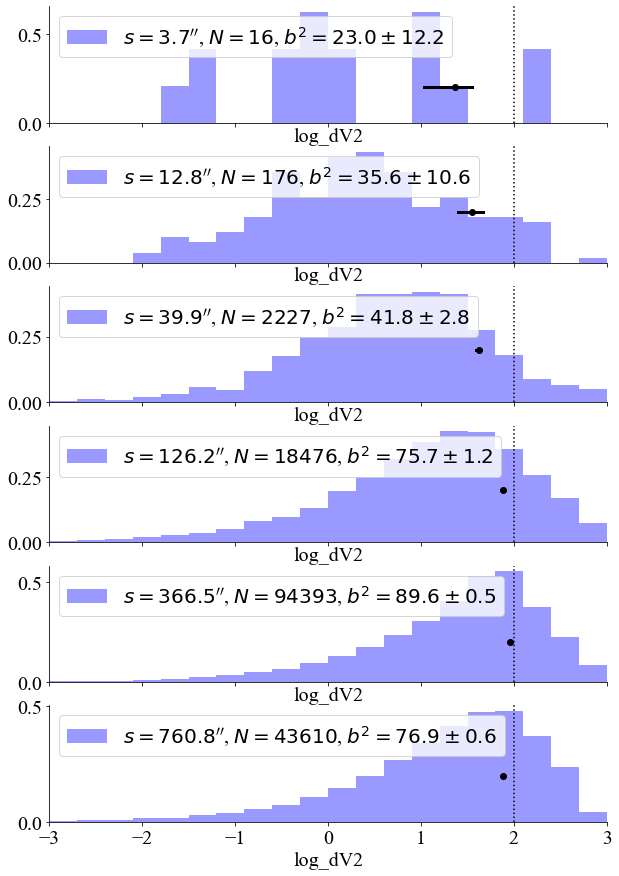

In [72]:
sig2 = pairs.dV2.mean()
sig2a = 2*np.var(df1.V)
fig, axes = plt.subplots(6, 1, figsize=(10, 15), sharex=True)
for sclass, ax in zip(range(1, 7), axes):
    b2mean = np.mean(pairs.dV2[pairs.s_class == sclass])
    b2std = np.std(pairs.dV2[pairs.s_class == sclass])
    b2mean2 = np.mean(pairs.log_dV2[pairs.s_class == sclass])
    n = np.sum(pairs.s_class == sclass)
    b2sem = b2std/np.sqrt(n)
    smean = np.mean(10**pairs.log_s[pairs.s_class == sclass])
    label = f"$s = {smean:.1f}''$"
    label += f", $N = {n}$"
    label += fr", $b^2 = {b2mean:.1f} \pm {b2sem:.1f}$"
    sns.distplot(pairs.log_dV2[pairs.s_class == sclass], 
                 norm_hist=True, kde=False, ax=ax,
                 label=label, bins=20,color="blue", hist_kws=dict(range=[-3.0, 3.0])
                )
    ax.plot([np.log10(b2mean)], [0.2], 'o', color='k')
    ax.plot([np.log10(b2mean - b2sem), np.log10(b2mean + b2sem)], [0.2]*2, lw=3, color='k')
    ax.axvline(np.log10(sig2a), color='k', ls=':')
    ax.set(xlim=[-3.0, 3.0])
    ax.legend(loc='upper left')
sns.despine()

In [73]:
print(f'Dotted line is 2 x sigma^2 = {sig2a:.2f}')

Dotted line is 2 x sigma^2 = 100.26


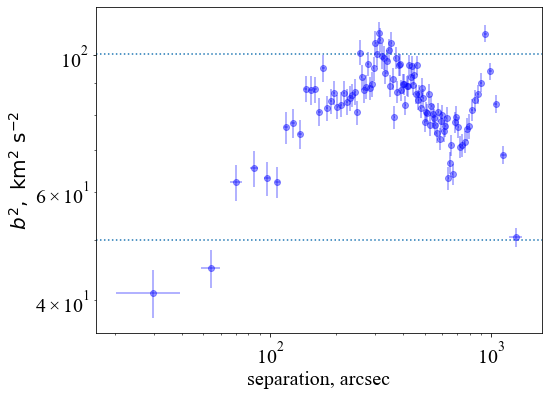

In [74]:
ngroup = 1500
groups = np.arange(len(pairs)) // ngroup
table = pairs[['s', 'dV2']].sort_values('s').groupby(groups).describe()
fig, ax = plt.subplots(figsize=(8, 6))
s = table[('s', 'mean')]
e_s = table[('s', 'std')]
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')]/np.sqrt(ng - 1)
#ax.plot(s, b2, 'o')
ax.axhline(sig2a, ls=':')
ax.axhline(0.5*sig2a, ls=':')
ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4,color="blue")
#sgrid = np.logspace(1.0, 3.0)
#ax.plot(sgrid, 0.08*sgrid**(0.83), color="k", lw=0.5)
ax.set(xscale='log', yscale='log', 
       xlabel='separation, arcsec',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

In [75]:
table=[s*pc1,b2,e_s,e_b2]
dfx2=pd.DataFrame(table)
dfx2=dfx2.transpose()
dfx2=dfx2.set_axis(['pc', 'S', 'ErrX', 'ErrY'], axis=1, inplace=False)
dfx2.to_csv('SFdata//CarR2.csv',mode = 'w', index=False)

Combined

In [77]:
df4 = dfHa[['RAdeg', 'DEdeg', 'V_mean']].copy()
df4.rename(columns = {'RAdeg' : 'X', 'DEdeg' : 'Y', 'V_mean' : 'RV'}, inplace = True)
df4

,X,Y,RV
0,160.9408,-59.51381,-7.175543
1,161.2433,-59.55172,-7.391660
2,161.2100,-59.59631,-9.893945
3,161.1413,-59.58192,-22.703236
4,161.3221,-59.70569,-12.487097
...,...,...,...
861,160.9409,-59.55744,-6.430415
862,160.9275,-59.54794,-8.695479
863,160.8832,-59.56567,-8.319904
864,160.9601,-59.56681,-9.309055


In [84]:
df1 = pd.DataFrame(
    {'RA': dfHa.RAdeg, 'DE': dfHa.DEdeg, 'V':vHa, '_key': 1}
)

In [85]:
df1.describe()

,RA,DE,V,_key
count,855.000000,855.000000,855.000000,855.0
mean,161.162622,-59.654128,-8.830675,1.0
std,0.132337,0.080008,4.229329,0.0
min,160.768700,-59.891890,-22.703236,1.0
25%,161.068450,-59.712000,-11.433731,1.0
50%,161.157600,-59.658080,-8.695479,1.0
75%,161.267100,-59.589670,-5.994656,1.0
max,161.472400,-59.494310,2.921228,1.0


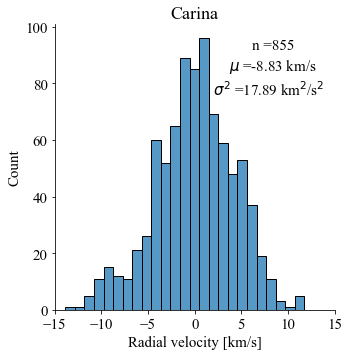

In [111]:
#fig, ax = plt.subplots()

sns.displot(df1.V-df1.V.mean(),bins=25)
plt.xlim(-15,15)


plt.text(0.45, 0.55,'n ='+str(df1.V.count()), ha='center', va='center', transform=ax.transAxes, color='k')
plt.text(0.45, 0.50,'$μ$ ='+str(np.round(df1.V.mean(),2))+' km/s', ha='center', va='center', transform=ax.transAxes, color='k')
plt.text(0.44, 0.45,'$σ^{2}$ ='+str(np.round(df1.V.var(),2))+' km$^{2}$/s$^{2}$', ha='center', va='center', transform=ax.transAxes, color='k')

plt.title('Carina')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="13"

plt.xlabel('Radial velocity [km/s]')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"
plt.savefig('Hist//Car.pdf', bbox_inches='tight')

In [87]:
df2 = df1.copy()

In [88]:
pairs = pd.merge(df1, df2, on='_key', suffixes=('', '_')).drop('_key', 1)
pairs.index = pd.MultiIndex.from_product((df1.index, df2.index))

In [89]:
pairs.head()

RA        DE         V       RA_       DE_         V_
0 0  160.9408 -59.51381 -7.175543  160.9408 -59.51381  -7.175543
  1  160.9408 -59.51381 -7.175543  161.2433 -59.55172  -7.391660
  2  160.9408 -59.51381 -7.175543  161.2100 -59.59631  -9.893945
  3  160.9408 -59.51381 -7.175543  161.1413 -59.58192 -22.703236
  4  160.9408 -59.51381 -7.175543  161.3221 -59.70569 -12.487097

In [90]:
pairs.loc[:, 'dDE'] = 3600*(pairs.DE - pairs.DE_)
pairs.loc[:, 'dRA'] = 3600*(pairs.RA - pairs.RA_)*np.cos(np.radians(0.5*(pairs.DE + pairs.DE_)))
pairs.loc[:, 's'] = np.hypot(pairs.dRA, pairs.dDE)
pairs.loc[:, 'log_s'] = np.log10(pairs.s)
pairs.loc[:, 'dV'] = pairs.V - pairs.V_
pairs.loc[:, 'dV2'] = pairs.dV**2
pairs.loc[:, 'log_dV2'] = np.log10(pairs.dV**2)
pairs.loc[:, 'VV_mean'] = 0.5*(pairs.V + pairs.V_)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [91]:
pairs = pairs[(pairs.dDE > 0.0) & (pairs.dRA > 0.0)]

In [92]:
pairs.head()

RA        DE         V       RA_       DE_        V_      dDE  \
0 11  160.9408 -59.51381 -7.175543  160.9254 -59.55578 -7.501601  151.092   
  25  160.9408 -59.51381 -7.175543  160.9183 -59.56622 -6.857996  188.676   
  54  160.9408 -59.51381 -7.175543  160.9254 -59.55578 -7.285478  151.092   
  55  160.9408 -59.51381 -7.175543  160.9000 -59.57164 -8.273070  208.188   
  84  160.9408 -59.51381 -7.175543  160.9233 -59.55178 -7.219278  136.692   

            dRA           s     log_s        dV       dV2   log_dV2   VV_mean  
0 11  28.108912  153.684428  2.186630  0.326058  0.106314 -0.973412 -7.338572  
  25  41.061855  193.092488  2.285765 -0.317548  0.100837 -0.996381 -7.016770  
  54  28.108912  153.684428  2.186630  0.109934  0.012086 -1.917734 -7.230511  
  55  74.452842  221.100586  2.344590  1.097527  1.204565  0.080830 -7.724307  
  84  31.943841  140.374898  2.147289  0.043734  0.001913 -2.718355 -7.197411

In [93]:
pairs.describe()

,RA,DE,V,RA_,DE_,V_,dDE,dRA,s,log_s,dV,dV2,log_dV2,VV_mean
count,158898.000000,158898.000000,158898.000000,158898.000000,158898.000000,158898.000000,158898.000000,158898.000000,158898.000000,158898.000000,158898.000000,1.588980e+05,158898.000000,158898.000000
mean,161.248591,-59.622840,-8.379525,161.108225,-59.708101,-9.158147,306.938792,255.187624,441.770466,2.565181,0.778622,3.749540e+01,1.015622,-8.768836
std,0.111299,0.063358,4.604865,0.110135,0.073249,3.934883,243.492084,192.784289,246.221348,0.290559,6.073663,5.268445e+01,0.969969,3.020214
min,160.881100,-59.885500,-22.703236,160.768700,-59.891890,-22.703236,0.072000,0.181342,0.211978,-0.673709,-25.624463,3.801128e-11,-10.420088,-21.423836
25%,161.166700,-59.668330,-11.387402,161.042500,-59.744250,-11.434322,115.812000,99.607933,260.105192,2.415149,-3.207982,3.639902e+00,0.561090,-10.747008
50%,161.266700,-59.627640,-8.270288,161.112900,-59.711390,-8.933815,251.100000,216.469030,407.012504,2.609608,0.811212,1.690012e+01,1.227890,-8.649784
75%,161.332500,-59.570780,-4.697975,161.180400,-59.665580,-6.860020,442.800000,372.035888,583.830864,2.766287,4.898313,4.947631e+01,1.694397,-6.669889
max,161.472400,-59.494310,2.921228,161.462100,-59.494720,2.921228,1431.288000,1280.427149,1693.387954,3.228756,24.786356,6.566131e+02,2.817310,2.753221


In [94]:
pairs.corr()

,RA,DE,V,RA_,DE_,V_,dDE,dRA,s,log_s,dV,dV2,log_dV2,VV_mean
RA,1.000000,-0.136218,-0.052246,0.541279,-0.070135,-0.073629,-0.051646,0.487405,0.210137,0.256414,0.008091,0.001988,0.024227,-0.087793
DE,-0.136218,1.000000,0.366337,-0.115339,0.517674,-0.057634,0.376107,-0.021139,0.298798,0.272785,0.315084,0.055200,0.038820,0.241729
V,-0.052246,0.366337,1.000000,-0.042431,0.189289,-0.005555,0.138166,-0.010092,0.111017,0.100342,0.761768,0.020336,0.030486,0.758722
RA_,0.541279,-0.115339,-0.042431,1.000000,0.009630,-0.123324,-0.118472,-0.470377,-0.366669,-0.304182,0.047727,0.009330,0.007170,-0.112683
DE_,-0.070135,0.517674,0.189289,0.009630,1.000000,-0.190897,-0.598057,-0.081269,-0.494197,-0.416883,0.267187,0.004047,-0.003958,0.019947
V_,-0.073629,-0.057634,-0.005555,-0.123324,-0.190897,1.000000,0.152750,0.050311,0.140137,0.092177,-0.652071,-0.199292,-0.129117,0.647190
dDE,-0.051646,0.376107,0.138166,-0.118472,-0.598057,0.152750,1.000000,0.068211,0.815102,0.707005,0.005792,0.047325,0.040650,0.204835
dRA,0.487405,-0.021139,-0.010092,-0.470377,-0.081269,0.050311,0.068211,1.000000,0.600946,0.584789,-0.040246,-0.007667,0.017929,0.025080
s,0.210137,0.298798,0.111017,-0.366669,-0.494197,0.140137,0.815102,0.600946,1.000000,0.907523,-0.006619,0.030599,0.042292,0.175921
log_s,0.256414,0.272785,0.100342,-0.304182,-0.416883,0.092177,0.707005,0.584789,0.907523,1.000000,0.016358,0.056716,0.074534,0.136541


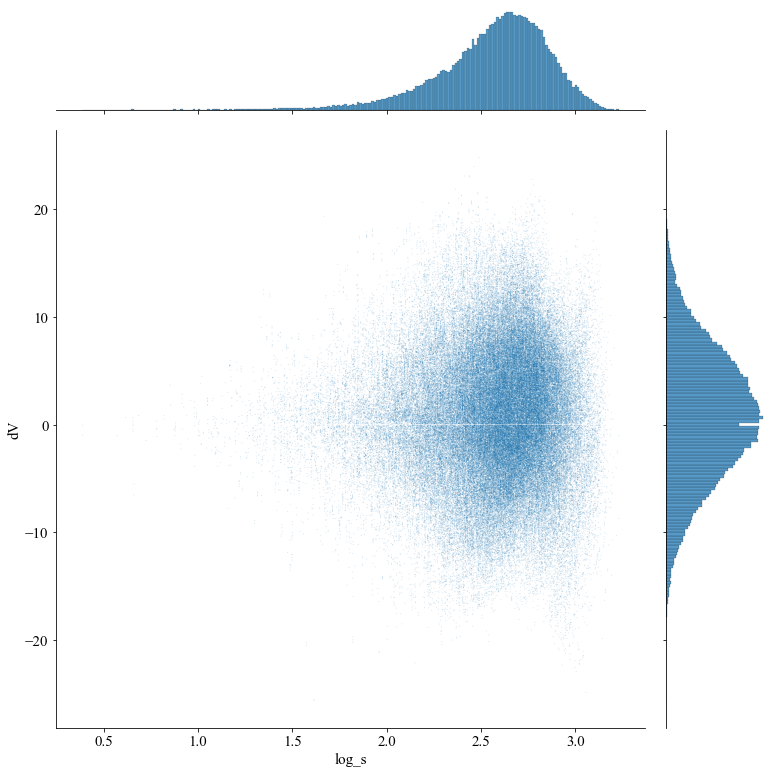

In [95]:
mask = (pairs.log_s > 0.0) & (pairs.log_dV2 > -3)
ax = sns.jointplot(x='log_s', y='dV', data=pairs[mask], alpha=0.2, s=1, edgecolor='none')
ax.fig.set_size_inches(12, 12)

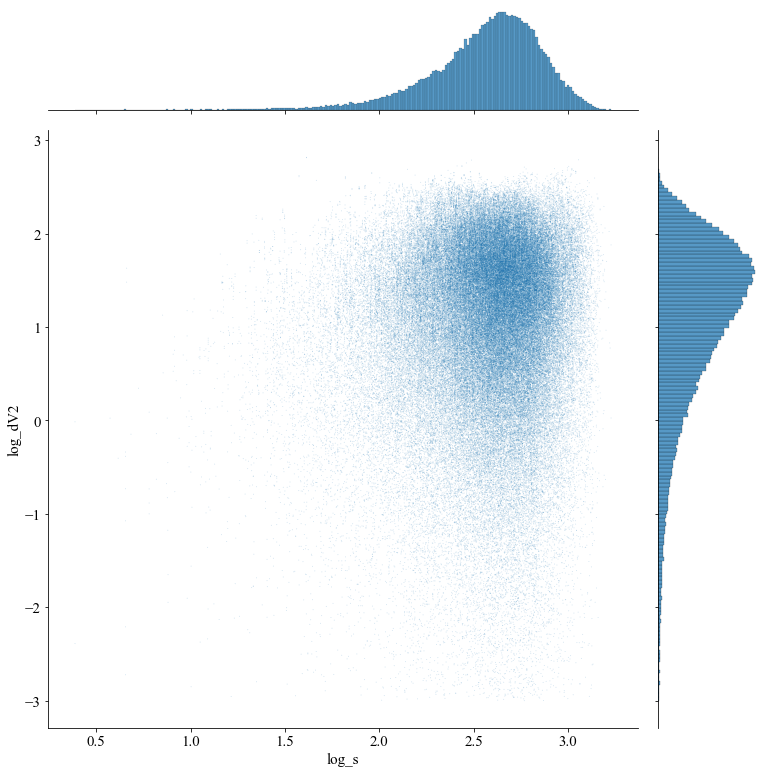

In [96]:
mask = (pairs.log_s > 0.0) & (pairs.log_dV2 > -3)
ax = sns.jointplot(x='log_s', y='log_dV2', data=pairs[mask], alpha=0.2, s=1, edgecolor='none')
ax.fig.set_size_inches(12, 12)

In [97]:
pairs.loc[:, 's_class'] = pd.Categorical((2*pairs.log_s + 0.5).astype('int'), ordered=True)

In [98]:
pairs.s_class[pairs.s_class == 0] = 1

In [99]:
for j in range(7):
    print()
    print("s_class =", j)
    print(pairs[pairs.s_class == j][['dV2', 'log_s']].describe())


s_class = 0
       dV2  log_s
count  0.0    0.0
mean   NaN    NaN
std    NaN    NaN
min    NaN    NaN
25%    NaN    NaN
50%    NaN    NaN
75%    NaN    NaN
max    NaN    NaN

s_class = 1
             dV2      log_s
count  16.000000  16.000000
mean    5.014731   0.470543
std    12.520602   0.411279
min     0.001895  -0.673709
25%     0.160473   0.526791
50%     0.403821   0.654966
75%     0.991150   0.656446
max    42.751875   0.723970

s_class = 2
              dV2       log_s
count  176.000000  176.000000
mean     7.298944    1.091564
std     10.736813    0.116531
min      0.000581    0.780460
25%      0.372031    1.015461
50%      2.863256    1.104573
75%      8.194566    1.194617
max     60.571379    1.239472

s_class = 3
                dV2        log_s
count  2.227000e+03  2227.000000
mean   1.561455e+01     1.583505
std    3.483521e+01     0.128390
min    5.390344e-07     1.250376
25%    9.648245e-01     1.490021
50%    4.552383e+00     1.612689
75%    1.580428e+01     1.694222


C:\Users\ZAINTEL2\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


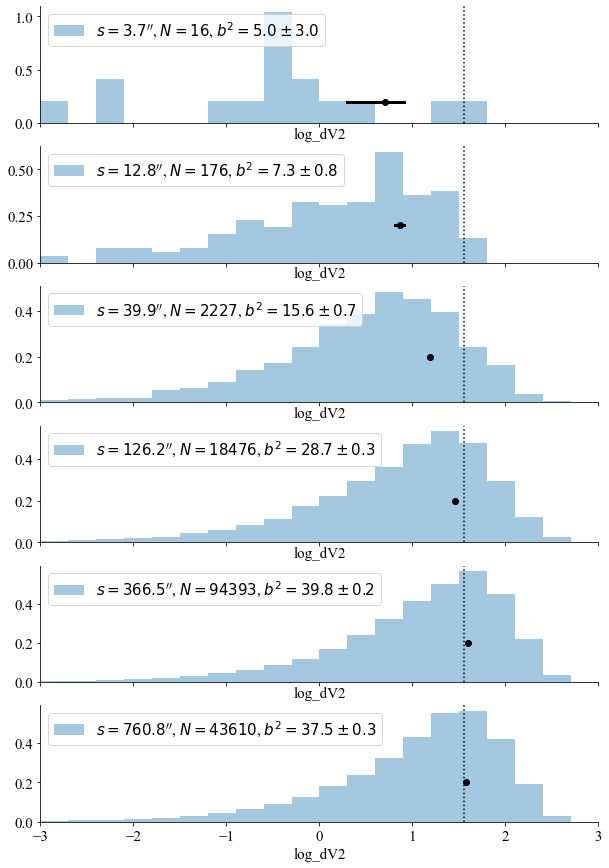

In [100]:
sig2 = pairs.dV2.mean()
sig2a = 2*np.var(df1.V)
fig, axes = plt.subplots(6, 1, figsize=(10, 15), sharex=True)
for sclass, ax in zip(range(1, 7), axes):
    b2mean = np.mean(pairs.dV2[pairs.s_class == sclass])
    b2std = np.std(pairs.dV2[pairs.s_class == sclass])
    b2mean2 = np.mean(pairs.log_dV2[pairs.s_class == sclass])
    n = np.sum(pairs.s_class == sclass)
    b2sem = b2std/np.sqrt(n)
    smean = np.mean(10**pairs.log_s[pairs.s_class == sclass])
    label = f"$s = {smean:.1f}''$"
    label += f", $N = {n}$"
    label += fr", $b^2 = {b2mean:.1f} \pm {b2sem:.1f}$"
    sns.distplot(pairs.log_dV2[pairs.s_class == sclass], 
                 norm_hist=True, kde=False, ax=ax,
                 label=label, bins=20, hist_kws=dict(range=[-3.0, 3.0])
                )
    ax.plot([np.log10(b2mean)], [0.2], 'o', color='k')
    ax.plot([np.log10(b2mean - b2sem), np.log10(b2mean + b2sem)], [0.2]*2, lw=3, color='k')
    ax.axvline(np.log10(sig2a), color='k', ls=':')
    ax.set(xlim=[-3.0, 3.0])
    ax.legend(loc='upper left')
sns.despine()

In [101]:
print(f'Dotted line is 2 x sigma^2 = {sig2a:.2f}')

Dotted line is 2 x sigma^2 = 35.73


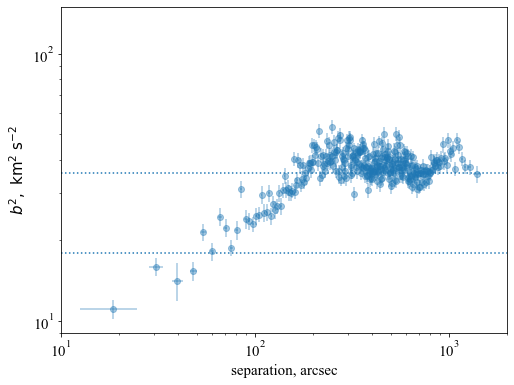

In [102]:
ngroup = 500
groups = np.arange(len(pairs)) // ngroup
table = pairs[['s', 'dV2']].sort_values('s').groupby(groups).describe()
fig, ax = plt.subplots(figsize=(8, 6))
s = table[('s', 'mean')]
e_s = table[('s', 'std')]
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')]/np.sqrt(ng - 1)
#ax.plot(s, b2, 'o')
ax.axhline(sig2a, ls=':')
ax.axhline(0.5*sig2a, ls=':')
ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4)
ax.set(xscale='log', yscale='log', 
       xlim=[10.0, 2000.0], ylim=[9.0, 150.0],
       xlabel='separation, arcsec',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

In [103]:
df1.V.std()


4.229328754608086

In [104]:
table=[s*pc1,b2,e_s,e_b2]
dfx2=pd.DataFrame(table)
dfx2=dfx2.transpose()
dfx2=dfx2.set_axis(['pc', 'S', 'ErrX', 'ErrY'], axis=1, inplace=False)
dfx2.to_csv('SFdata//Car2.csv',mode = 'w', index=False)

In [106]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 104.38017702102661 seconds ---
